In [ ]:
#@title Installs
!pip uninstall cupy-cuda115 -q
!pip install cupy-cuda11x -q
!pip3 install scanpy[leiden] -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
#@title Imports and Set Seed
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42

from matplotlib import font_manager
plt.rcParams['font.size'] = 7

import math
import random
from random import randrange
import itertools

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, Subset

from google.colab import drive # Import if using Google Colab


def weight_init_seed(seed):
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  np.random.seed(seed)
  random.seed(seed)

  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

weight_init_seed(6631)

/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:540: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


# Create Pseudobulk

In [ ]:
# Read in data
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

t0.var_names_make_unique()
t1.var_names_make_unique()
t2.var_names_make_unique()
t3.var_names_make_unique()
t4.var_names_make_unique()
t5.var_names_make_unique()
t6.var_names_make_unique()

t0.var['original_index'] = range(len(t0.var))
t1.var['original_index'] = range(len(t0.var))
t2.var['original_index'] = range(len(t0.var))
t3.var['original_index'] = range(len(t0.var))
t4.var['original_index'] = range(len(t0.var))
t5.var['original_index'] = range(len(t0.var))
t6.var['original_index'] = range(len(t0.var))

sc.pp.filter_cells(t0, min_genes=100)
sc.pp.filter_cells(t1, min_genes=100)
sc.pp.filter_cells(t2, min_genes=100)
sc.pp.filter_cells(t3, min_genes=100)
sc.pp.filter_cells(t4, min_genes=100)
sc.pp.filter_cells(t5, min_genes=100)
sc.pp.filter_cells(t6, min_genes=100)

sc.pp.filter_genes(t0, min_cells=3)
sc.pp.filter_genes(t1, min_cells=3)
sc.pp.filter_genes(t2, min_cells=3)
sc.pp.filter_genes(t3, min_cells=3)
sc.pp.filter_genes(t4, min_cells=3)
sc.pp.filter_genes(t5, min_cells=3)
sc.pp.filter_genes(t6, min_cells=3)

h5_files = [t0, t1, t2, t3, t4, t5, t6]
pseudo_bulks = []

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

In [ ]:
# Find common genes (intersection of .var.index across all time points)
common_genes = set(h5_files[0].var.index)
for adata in h5_files[1:]:
    common_genes.intersection_update(adata.var.index)

new_gene_series = t0.var.loc[list(common_genes)]
gene_index_list = new_gene_series['original_index'].tolist()

In [ ]:
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

t0.var['original_index'] = range(len(t0.var))
t1.var['original_index'] = range(len(t0.var))
t2.var['original_index'] = range(len(t0.var))
t3.var['original_index'] = range(len(t0.var))
t4.var['original_index'] = range(len(t0.var))
t5.var['original_index'] = range(len(t0.var))
t6.var['original_index'] = range(len(t0.var))

sc.pp.filter_cells(t0, min_genes=100)
sc.pp.filter_cells(t1, min_genes=100)
sc.pp.filter_cells(t2, min_genes=100)
sc.pp.filter_cells(t3, min_genes=100)
sc.pp.filter_cells(t4, min_genes=100)
sc.pp.filter_cells(t5, min_genes=100)
sc.pp.filter_cells(t6, min_genes=100)

t0.var_names_make_unique()
t1.var_names_make_unique()
t2.var_names_make_unique()
t3.var_names_make_unique()
t4.var_names_make_unique()
t5.var_names_make_unique()
t6.var_names_make_unique()

old_h5_files = [t0, t1, t2, t3, t4, t5, t6]
h5_files = []
copies = []

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

In [ ]:
for ti in old_h5_files:
    filtered_X = ti.X.todense()[:, gene_index_list]

    new_adata = ad.AnnData(filtered_X, obs=ti.obs, var=new_gene_series)

    h5_files.append(new_adata)

/usr/local/lib/python3.10/dist-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [ ]:
t0, t1, t2, t3, t4, t5, t6 = h5_files

In [ ]:
def pseudo_bulk(h5_file):
  '''
  Creates pseudobulk of h5 file. Takes average of a single gene across all cells.
  '''
  sc.pp.normalize_total(h5_file, target_sum=1e4)  # Normalize single-cell data

  h5_file.X[h5_file.X < 10] = 0  # Threshold at < 10

  sc.pp.normalize_total(h5_file, target_sum=1e4) # Normalize again

  pseudobulk_h5_file = np.asarray(h5_file.X.mean(axis=0)).flatten() # Avg

  pseudobulk_h5_file = np.log1p(pseudobulk_h5_file) # Log1p

  return pseudobulk_h5_file

In [ ]:
def create_pseudo_bulk(h5_files):
  '''
  Generates pseudobulk from all time-stamps
  '''
  pseudo_bulks = []
  for h5_file in h5_files:
    pseudo_h5 = pseudo_bulk(h5_file)
    pseudo_bulks.append(pseudo_h5)

  return np.array(pseudo_bulks)

In [ ]:
obs_names = {} # For .obs of bulk AnnData object
for i in range(len(h5_files)): # 7
  obs_names[i] = "TimeStamp" + str(i)
obs_frame = pd.DataFrame(list(obs_names.items()), columns=['Index', 'TimeStamp'])

In [ ]:
# Create bulk object
bulks = create_pseudo_bulk(h5_files)
bulks_adata = ad.AnnData(bulks, obs=obs_frame, var=h5_files[0].var)
sc.pp.highly_variable_genes(bulks_adata, n_top_genes=6000, subset=True)

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
# Add names of files
bulks_adata.obs['files'] = ['GSM4504959_E12.5_filtered_gene_bc_matrices.h5', 'GSM4504960_E15.5_filtered_gene_bc_matrices.h5',
                            'GSM4504961_E17.5_filtered_gene_bc_matrices.h5', 'GSM4504962_P3_filtered_gene_bc_matrices.h5',
                            'GSM4504963_P7_filtered_gene_bc_matrices.h5', 'GSM4504964_P15_filtered_gene_bc_matrices.h5',
                            'GSM4504965_P42_filtered_gene_bc_matrices.h5']

In [ ]:
def pick_gene(gene_no, gene_database=bulks_adata):
  return gene_database.X[:, gene_no]

In [ ]:
# Look at time series patterns of a selected gene
gene_timeseries = pick_gene(0)
def plot_geneseries(gene):
  length = [x for x in range(len(gene))]
  plt.plot(length, gene)
  plt.xlabel('Time')
  plt.ylabel('Gene Expression')

# plot_geneseries(gene_timeseries)

# Model

### KNN Function
Find neighboring genes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
k = 15
k += 1
neighbors = NearestNeighbors(n_neighbors=k) # k = x, x-1 neighbors
neighbors.fit(bulks_adata.X.T)

def find_neighbors(g, neighbors_func=neighbors, gene_database=bulks_adata):
  neighbor_arr = neighbors_func.kneighbors([g])
  return neighbor_arr[1][0][1:]

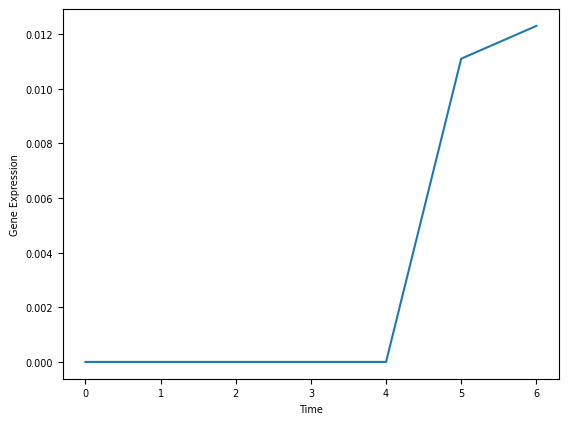

In [ ]:
# Check, do the time series looks similar?
gene_0 = pick_gene(0)
gene0_neighbors = find_neighbors(gene_0)
plot_geneseries(pick_gene(gene0_neighbors[1]))

### Data Preprocessing

In [ ]:
# Format input for NN
def format_input(g, gene_database=bulks_adata): # Shape input to our desired format: [g1,...,gt,n1,...,nt,1,2,...,t]
  """
    format_input formats the input for the NN

    :param g: Gene expression values for single gene g
    :param gene_database: Database to pull gene expressions from

    :return: Formatted input, with genes and neighbors as features
  """
  neighbors = find_neighbors(g, gene_database=gene_database) # Get indices of all neighbors of g
  input = np.array(g)

  for n in neighbors:
    neighbor_gene = np.array(pick_gene(n))
    input = np.concatenate((input, neighbor_gene), axis=None) # Concat neighbors with original gene

  return input

# gene0 = format_input(pick_gene(0))

In [ ]:
all_inputs = [] # All inputs, formatted, not scaled

time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]

for i in range( int(len(bulks_adata.var)) ):
  # Pick gene and format the input
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)

  all_inputs.append(formatted_input)

In [ ]:
# Masking mechanism
def mask(time_points, input, mask_value=np.NINF, gene_database=bulks_adata): # Time points start form 0. Time points is of type array
  """
    mask is function to mask inputs

    :param time_points: Array. What time points to mask
    :param input: Input array to be masked
    :param gene_database: Database to pull gene expressions from

    :return: Masked array and masked values separately. Masked array has masked index appended to end.
  """
  new_arr = input.copy()
  max_timepoints = bulks_adata.obs.shape[0]
  masked = []

  first_y = []

  for n in range(len(input)):
    ts_mask = n % max_timepoints

    if ts_mask in time_points: # Mask each time-point for every neighbour
      masked.append(new_arr[n])

      if ts_mask == time_points[0]:
        first_y.append(new_arr[n])

      new_arr[n] = mask_value  # Masked with -inf by default

  new_arr = np.append(new_arr, time_points[0])

  return new_arr, first_y

# test, masked = mask([2, 1, 3], gene0)
# print(gene0)
# print(test, masked)

In [ ]:
X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=True) # 80/20 Split all inputs

In [ ]:
all_data = [] # Append time embeddings
for i in range(len(X_train_note)):
  all_data.append( np.append(X_train_note[i], time_embeddings) )

for i in range( len(X_test_note) ):
  all_data.append( np.append(X_test_note[i], time_embeddings) )

In [ ]:
X_train = []
X_test = []

for i in range(int(len(all_data) * 0.8)): # 80%, 20% split
  X_train.append( all_data[i] )

for i in range(int(len(all_data) * 0.8)+1, len(all_data)):
  X_test.append( all_data[i] )

In [ ]:
time_embeddings=[0, 1, 2, 3, 4, 5, 6]

In [ ]:
def generate_combintations(n, time_points=time_embeddings):
  """
    generate_combintations generates combinations for masking of time points of length n.
    First element is masked and to be predicted, rest are masked.
    Function generates special kind of permutation where only order of first element matters.

    :param time_points: Max number of time points
    :param n: Length of combination (number of time points to mask)

    :return: List of combinations
  """
  combinations = []
  to_skip = int(math.factorial(n-1))-1 # Want only permutations where first number is different, skip the rest
  skipped = to_skip

  # time_array = [x for x in range(time_points)]

  for comb in itertools.combinations(time_points, n): # Generate combinations of length n
    to_avg = [] # Group together permutations that will be averaged in the end

    for permutation in list(itertools.permutations(comb)): # Generate permutations of those combinations
      if skipped > 0: # Dont want all permutations
        skipped -= 1
        continue

      to_avg.append(list(permutation))

      skipped = to_skip

    combinations.append(to_avg)

    # e.g. combinations[0] has lists of size n. Caluclate MAE for predictions of all of them, take average.

  return combinations
# generate_combintations(3)

In [ ]:
def gen_loader(X_train, n):
  '''
  Generate training for Regressor NN
  '''
  X_train_loader = []
  i = 0
  while i < len(X_train)-1:

    for comb in generate_combintations(n):
      loader = []
      for seq in comb:

        if i > len(X_train)-1:
          break

        masked, y = mask(seq, X_train[i])
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)
        arr = [masked, y]

        loader.append(arr)

      X_train_loader.append(loader)
      i += 1

  return X_train_loader

In [ ]:
X_train_loader = []
AE_train_loader = []
AE_test_loader = []

for i in range(1, len(time_embeddings)):
  random.shuffle(X_train)
  gen_i = gen_loader(X_train, i)

  X_train_loader.extend( gen_i )

  random.shuffle(gen_i)

  for j in gen_i[:len(gen_i)//2]:
    AE_train_loader.extend( j )

  random.shuffle(X_test)
  gen_i_test = gen_loader(X_test, i)
  random.shuffle(gen_i_test)

  for t in gen_i_test:
    AE_test_loader.extend( t )

random.shuffle(X_train_loader)
random.shuffle(AE_train_loader)

In [ ]:
class GeneDatasetAE(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, X):
        # self.genes = genes
        self.X = X
        # self.X = torch.tensor(X, dtype=torch.float32)
        # self.y = y.detach().clone()

  def __len__(self):
        return len(self.X)

  def __getitem__(self, index):
        # Generates one sample of data
        gene = self.X[index]

        return gene

In [ ]:
AEgeneTrainSet = GeneDatasetAE(AE_train_loader)
AE_train_loader_x = DataLoader(AEgeneTrainSet, shuffle=True, batch_size=3)

AEgeneTestSet = GeneDatasetAE(AE_train_loader)
AE_test_loader_X = DataLoader(AEgeneTestSet, shuffle=True, batch_size=3)

### AutoEncoder + NN

In [58]:
class HybridNN(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(output_size, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.ReLU()
        )

        self.regressor = nn.Sequential(
            nn.Linear(output_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.ReLU()
        )

    def forward(self, x):
        # AutoEncoder
        z = self.encoder(x)
        decoded = self.decoder(z)

        # Regressor NN
        regression = self.regressor(z)

        return decoded, regression

In [59]:
def custom_loss(y_pred, y, loss_fn):
  '''
  Skip over masked values in the calculation. This is done for AE phase
  '''
  mask = ~torch.isinf(y) # True if not infinity
  return loss_fn(y_pred[mask], y[mask])

In [60]:
dim_reduction_size = 64
hybrid_model = HybridNN((k+1) * len(time_embeddings) + 1, dim_reduction_size)

loss_MSE = nn.MSELoss() # For AutoEncoder
loss_MAE = nn.L1Loss(reduction='none') # For Regressor

# Stage 1: AE
optimizer_enc = optim.Adam(hybrid_model.encoder.parameters(), lr=0.001, weight_decay=0.0001)
optimizer_dec = optim.Adam(hybrid_model.decoder.parameters(), lr=0.001, weight_decay=0.0001)

# Stage 2: Regressor
optimizer_reg = optim.SGD(hybrid_model.regressor.parameters(), lr=0.001, momentum=0.9)
scheduler_reg = optim.lr_scheduler.ExponentialLR(optimizer_reg, gamma=0.9)

# Stage 3: Both
optimizer_both = optim.SGD(hybrid_model.parameters(), lr=0.0001, momentum=0.9) # Decrease learning rate when training in stage 3
scheduler_both = optim.lr_scheduler.ExponentialLR(optimizer_both, gamma=0.9)

optimizers = [optimizer_enc, optimizer_dec, optimizer_reg, optimizer_both]

In [61]:
def train_hybridNN_0mask(hyb_model, loader1, loader2, optimizers, loss_fn1, loss_fn2, custom_loss, epochs):
  '''
  Train model in 3 phases:
    1. AutoEncoder
    2. Regressor
    3. Both

    Learning rate is decreased in phase 3
  '''
  optimizer_enc, optimizer_dec, optimizer_reg, optimizer_both = optimizers

  epoch_vals = []
  loss_vals = []

  print("AutoEncoder:")

  # -------- Stage 1 --------
  # AutoEncoder Part:
  for epoch in range(epochs):
    hyb_model.train()
    last_loss = 0

    for AE_input, _ in loader1:
      masked_X = torch.nan_to_num(AE_input, nan=0.0, neginf=0.0) # Make all -inf to 0 for forward pass
      reconstructed, _ = hyb_model(masked_X)

      loss = custom_loss(reconstructed, AE_input, loss_fn1) # Calculate MSE only for non-masked values

      optimizer_enc.zero_grad()
      optimizer_dec.zero_grad()

      loss.backward()

      clipping_value = 10
      torch.nn.utils.clip_grad_norm_(hyb_model.parameters(), clipping_value)

      optimizer_enc.step()
      optimizer_dec.step()

      last_loss = loss.item()

    print(f'Epoch {epoch}: Loss = {last_loss}')

  print()
  print("Regressor:")

  # -------- Stage 2 --------
  for epoch in range(epochs):
    hyb_model.train()

    # Freeze AE
    for name, param in hyb_model.named_parameters():
      if "encoder" in name or "decoder" in name:
        param.requires_grad = False

    last_loss = 0

    # Regressor Part:

    for batch in loader2:
      if batch == []:
        continue

      avg_loss = 0
      optimizer_reg.zero_grad()

      for x, y in batch:
        masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
        _, y_pred = hyb_model(masked_X)

        loss = loss_fn2(y_pred, y)
        avg_loss += loss/len(batch)

      avg_loss.backward()

      optimizer_reg.step()
      last_loss = avg_loss.item()

    scheduler_reg.step()
    print(f'Epoch {epoch}: Loss = {last_loss}')

  print()
  print("Both:")

  # -------- Stage 3 --------
  for epoch in range(epochs):
    hyb_model.train()

    # Unfreeze AE
    for name, param in hyb_model.named_parameters():
      if "encoder" in name or "decoder" in name:
        param.requires_grad = True

    for batch in loader2:
      if batch == []:
        continue

      avg_loss_reg = 0
      avg_loss_ae = 0

      optimizer_both.zero_grad()

      for x, y in batch:
        masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
        reconstruction, y_pred = hyb_model(masked_X)

        loss_reg = loss_fn2(y_pred, y)
        avg_loss_reg += loss_reg/len(batch)

        loss_ae = custom_loss(reconstruction, x, loss_fn1)
        avg_loss_ae += loss_ae/len(batch)

      combined_loss = avg_loss_reg + avg_loss_ae
      combined_loss.backward()

      # optimizer.step()
      optimizer_both.step()
      last_loss = combined_loss.item()

    scheduler_both.step()

    print(f'Epoch {epoch}: Loss = {last_loss}')

In [ ]:
train_hybridNN_0mask(hybrid_model, AE_train_loader_x, X_train_loader, optimizers, loss_MSE, loss_MAE, custom_loss, epochs=15)

In [ ]:
torch.save(hybrid_model.state_dict(), "hybrid_model.pth")

In [ ]:
# hybrid_model = HybridNN((k+1) * len(time_embeddings) + 1, dim_reduction_size)
# hybrid_model.load_state_dict(torch.load("hybrid_model.pth")) # To load model

# Measuring Performance

In [ ]:
def MAE(pred, y):
  return abs(pred-y)

In [ ]:
def metric_combinationTS(gene_no, metric_func, n, database=all_data, model=hybrid_model, time_points=time_embeddings, printB=False):
  """
    metric_combinationTS calculate performance metric for prediction of combinations hidden time points for single gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)
    :param n: Length of combinations

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """

  model.eval()
  gene = database[gene_no]
  max_TS = int(gene[-1])+1

  combinations = generate_combintations(n)

  metric_values = []

  with torch.no_grad():
    for comb in combinations: # Sequence of combinations to average
      combintation_sum = 0 # Sum absolute error of all combinations, then divide by n
      seed = random.random()

      for sequence in comb: # Calculate MAE for each sequence, average them
        masked, y = mask(sequence, gene)
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

        zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0)
        _, prediction = model(zeros_X)

        metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
        combintation_sum += metric_measure

      avg_combination = combintation_sum/n
      metric_values.append(avg_combination) # Append value of error

      if printB: print(f'{metric_func.__name__} for time point(s) {comb[0]}: {avg_combination}') # Print error value for each time point(s)

  metric_values = np.array(metric_values)

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points

    lowest_MAE = combinations[metric_values.argmin()][0]
    print(f'Lowest time point(s): {lowest_MAE}')

  return metric_values


In [ ]:
# ar_24002 = metric_combinationTS(24002, MAE, 2, printB=True) # For one gene

In [ ]:
def avg_metric_combinationTS(metric_func, n, model, time_points=len(bulks_adata.obs), database=all_data, number_genes=len(bulks_adata.var), verbose=False):
  """
    avg_metric_combinationTS calculate average performance metric for prediction of combinations hidden time points for every gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)
    :param n: How many time points to mask
    :param database: Database to choose genes from
    :param number_genes: Total number of genes
    :param verbose: Print verbose output, otherwise only shows time points to choose for further analysis

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """
  TS_combinations = generate_combintations(n)
  avg_val = np.zeros(len(TS_combinations))

  for i in range(number_genes):
    vals = metric_combinationTS(i, metric_func, n, model=model, database=database, printB=False)
    avg_val += vals

  avg_val = avg_val/number_genes
  avg_allTS = 0

  for t in range(len(avg_val)):
    avg_allTS += avg_val[t]
    print(f'Average {metric_func.__name__} value for all genes at time point {TS_combinations[t][0]}: {avg_val[t]}')

  avg_allTS = avg_allTS/len(avg_val)

  if verbose:
    print()
    print(f'Average {metric_func.__name__} value for all genes: {avg_allTS}')

  lowest_MAE = TS_combinations[avg_val.argmin()][0]
  highest_MAE = TS_combinations[avg_val.argmax()][0]

  if verbose:
    print(f'Lowest time point: {lowest_MAE}')
    print(f'Highest time point: {highest_MAE}')

    print()
  to_choose = [x for x in time_embeddings if x not in lowest_MAE]
  print(f'Time Points to choose for further analysis: {to_choose}')

  return avg_val, avg_allTS

In [ ]:
avg_valarray_1, avg_val_1 = avg_metric_combinationTS(MAE, 1, hybrid_model, verbose=True)

Average MAE value for all genes at time point [0]: 0.06497100278184129
Average MAE value for all genes at time point [1]: 0.02537013329897309
Average MAE value for all genes at time point [2]: 0.049034212157324265
Average MAE value for all genes at time point [3]: 0.053937704369270555
Average MAE value for all genes at time point [4]: 0.05664672457886627
Average MAE value for all genes at time point [5]: 0.06176010209634357
Average MAE value for all genes at time point [6]: 0.07472919242518644

Average MAE value for all genes: 0.05520701024397221
Lowest time point: [1]
Highest time point: [6]

Time Points to choose for further analysis: [0, 2, 3, 4, 5, 6]


In [ ]:
avg_valarray_2, avg_val_2 = avg_metric_combinationTS(MAE, 2, hybrid_model, verbose=True)

Average MAE value for all genes at time point [0, 1]: 0.07729326605803605
Average MAE value for all genes at time point [0, 2]: 0.055680796239796715
Average MAE value for all genes at time point [0, 3]: 0.06121380940705421
Average MAE value for all genes at time point [0, 4]: 0.061711416936236975
Average MAE value for all genes at time point [0, 5]: 0.06426453518093331
Average MAE value for all genes at time point [0, 6]: 0.07114696394482356
Average MAE value for all genes at time point [1, 2]: 0.042057725422656705
Average MAE value for all genes at time point [1, 3]: 0.04137709977822184
Average MAE value for all genes at time point [1, 4]: 0.038296750259178225
Average MAE value for all genes at time point [1, 5]: 0.04436391560729438
Average MAE value for all genes at time point [1, 6]: 0.05136747662524188
Average MAE value for all genes at time point [2, 3]: 0.04940897686898825
Average MAE value for all genes at time point [2, 4]: 0.04745924537931569
Average MAE value for all genes at

In [ ]:
avg_valarray_3, avg_val_3 = avg_metric_combinationTS(MAE, 3, hybrid_model, verbose=True)

Average MAE value for all genes at time point [0, 2, 1]: 0.0876333599074603
Average MAE value for all genes at time point [0, 3, 1]: 0.06169340921765082
Average MAE value for all genes at time point [0, 4, 1]: 0.06727375831989213
Average MAE value for all genes at time point [0, 5, 1]: 0.07345863991490087
Average MAE value for all genes at time point [0, 6, 1]: 0.0778290865580267
Average MAE value for all genes at time point [0, 3, 2]: 0.052985763041651895
Average MAE value for all genes at time point [0, 4, 2]: 0.05268739854693786
Average MAE value for all genes at time point [0, 5, 2]: 0.05702587135592082
Average MAE value for all genes at time point [0, 6, 2]: 0.062284525530309436
Average MAE value for all genes at time point [0, 4, 3]: 0.06526230444629118
Average MAE value for all genes at time point [0, 5, 3]: 0.06115045325918546
Average MAE value for all genes at time point [0, 6, 3]: 0.06490460804578883
Average MAE value for all genes at time point [0, 5, 4]: 0.06403894699268527

In [ ]:
avg_valarray_4, avg_val_4 = avg_metric_combinationTS(MAE, 4, hybrid_model, verbose=True)

Average MAE value for all genes at time point [0, 3, 2, 1]: 0.07336761737100217
Average MAE value for all genes at time point [0, 4, 2, 1]: 0.07491623574415765
Average MAE value for all genes at time point [0, 5, 2, 1]: 0.08104655645583989
Average MAE value for all genes at time point [0, 6, 2, 1]: 0.0831270462640047
Average MAE value for all genes at time point [0, 4, 3, 1]: 0.06645574509034728
Average MAE value for all genes at time point [0, 5, 3, 1]: 0.061672100487849095
Average MAE value for all genes at time point [0, 6, 3, 1]: 0.06868655988407166
Average MAE value for all genes at time point [0, 5, 4, 1]: 0.06581496922751831
Average MAE value for all genes at time point [0, 6, 4, 1]: 0.07054218675017182
Average MAE value for all genes at time point [0, 6, 5, 1]: 0.09501590603968361
Average MAE value for all genes at time point [0, 4, 3, 2]: 0.06489960215968797
Average MAE value for all genes at time point [0, 5, 3, 2]: 0.05558797311591722
Average MAE value for all genes at time 

In [ ]:
avg_valarray_5, avg_val_5 = avg_metric_combinationTS(MAE, 5, hybrid_model, verbose=True)

Average MAE value for all genes at time point [0, 4, 3, 2, 1]: 0.1065595471424595
Average MAE value for all genes at time point [0, 5, 3, 2, 1]: 0.06904672616541707
Average MAE value for all genes at time point [0, 6, 3, 2, 1]: 0.0767208272006866
Average MAE value for all genes at time point [0, 5, 4, 2, 1]: 0.07208386216224556
Average MAE value for all genes at time point [0, 6, 4, 2, 1]: 0.0766968612262166
Average MAE value for all genes at time point [0, 6, 5, 2, 1]: 0.09048381928305609
Average MAE value for all genes at time point [0, 5, 4, 3, 1]: 0.06496141284849331
Average MAE value for all genes at time point [0, 6, 4, 3, 1]: 0.06938050419938538
Average MAE value for all genes at time point [0, 6, 5, 3, 1]: 0.0856395802822469
Average MAE value for all genes at time point [0, 6, 5, 4, 1]: 0.08577136049351361
Average MAE value for all genes at time point [0, 5, 4, 3, 2]: 0.061503725376356594
Average MAE value for all genes at time point [0, 6, 4, 3, 2]: 0.06451266433884549
Average

In [ ]:
avg_valarray_6, avg_val_6 = avg_metric_combinationTS(MAE, 6, hybrid_model, verbose=True)

Average MAE value for all genes at time point [0, 5, 4, 3, 2, 1]: 0.10503528798860215
Average MAE value for all genes at time point [0, 6, 4, 3, 2, 1]: 0.09166407934247423
Average MAE value for all genes at time point [0, 6, 5, 3, 2, 1]: 0.0840247614468161
Average MAE value for all genes at time point [0, 6, 5, 4, 2, 1]: 0.08417744418934066
Average MAE value for all genes at time point [0, 6, 5, 4, 3, 1]: 0.10287111560114952
Average MAE value for all genes at time point [0, 6, 5, 4, 3, 2]: 0.11431115852057681
Average MAE value for all genes at time point [1, 6, 5, 4, 3, 2]: 0.12088256280356349

Average MAE value for all genes: 0.10042377284178898
Lowest time point: [0, 6, 5, 3, 2, 1]
Highest time point: [1, 6, 5, 4, 3, 2]

Time Points to choose for further analysis: [4]


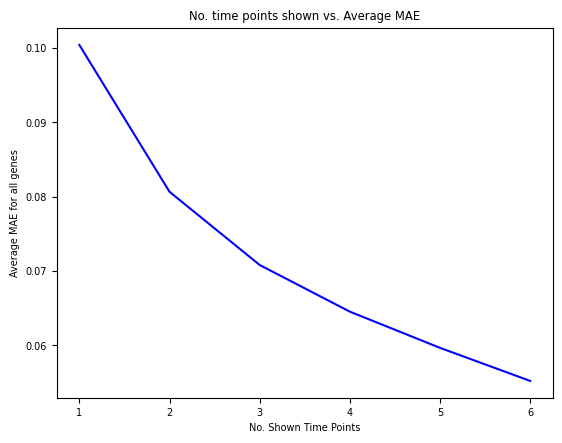

In [ ]:
plt.title(f"No. time points shown vs. Average MAE")
plt.plot([1, 2, 3, 4, 5, 6], [avg_val_6, avg_val_5, avg_val_4, avg_val_3, avg_val_2, avg_val_1], color='blue')
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average MAE for all genes')
plt.show()

In [ ]:
def correlation_combination_timepoint(n, database=all_data, model=hybrid_model, verbose=False):
  '''
    correlation_combination_timepoint calculate correlation for prediction of combinations hidden time points for every gene in database
  '''
  model.eval()

  combinations = generate_combintations(n)

  r_values = []
  r2_values = []

  with torch.no_grad():
    for comb in combinations:
      r_vals = 0
      r2_vals = 0

      seed = random.random()

      for sequence in comb:
        y_true_seq = np.zeros(len(bulks_adata.var))
        y_pred_seq = np.zeros(len(bulks_adata.var))

        for i in range(len(bulks_adata.var)):
          formatted_input = database[i]

          masked, y = mask(sequence, formatted_input)
          masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

          zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0)
          _, prediction = model(zeros_X)

          y_true_seq[i] = y.item()
          y_pred_seq[i] = prediction.item()

        r = scipy.stats.pearsonr(y_true_seq, y_pred_seq)[0]
        r_vals += r
        r2_vals += r**2

      r_values.append(r_vals/len(comb))
      r2_values.append(r2_vals/len(comb))


      if verbose:
        print(f'R for time point(s) {comb[0]}: {r}')
        print(f'R^2 for time point(s) {comb[0]}: {r**2}')
        print()

  r_values = np.array(r_values)
  r2_values = np.array(r2_values)

  avg_r2 = r2_values.sum()/len(r2_values)

  if printB: print(f'Average R^2: {avg_r2}')

  return r_values, avg_r2

In [ ]:
r_vals_1, r_avg_1 = correlation_combination_timepoint(1, verbose=True)

R for time point(s) [0]: 0.9316934249123887
R^2 for time point(s) [0]: 0.8680526380249769

R for time point(s) [1]: 0.9796886940225549
R^2 for time point(s) [1]: 0.9597899371956191

R for time point(s) [2]: 0.9526898953402156
R^2 for time point(s) [2]: 0.9076180366833511

R for time point(s) [3]: 0.970075337442223
R^2 for time point(s) [3]: 0.9410461603136427

R for time point(s) [4]: 0.9605276753855563
R^2 for time point(s) [4]: 0.9226134151815806

R for time point(s) [5]: 0.9665325735871652
R^2 for time point(s) [5]: 0.9341852158050288

R for time point(s) [6]: 0.957607552965136
R^2 for time point(s) [6]: 0.9170122254958758

Average R^2: 0.9214739469571536


In [ ]:
r_vals_2, r_avg_2 = correlation_combination_timepoint(2, verbose=True)

R for time point(s) [0, 1]: 0.902681429364738
R^2 for time point(s) [0, 1]: 0.8148337629199666

R for time point(s) [0, 2]: 0.9510640462747368
R^2 for time point(s) [0, 2]: 0.9045228201164748

R for time point(s) [0, 3]: 0.968944406804547
R^2 for time point(s) [0, 3]: 0.9388532634778154

R for time point(s) [0, 4]: 0.9603928170912588
R^2 for time point(s) [0, 4]: 0.922354363120484

R for time point(s) [0, 5]: 0.9631048139720793
R^2 for time point(s) [0, 5]: 0.9275708826961934

R for time point(s) [0, 6]: 0.9555878206917431
R^2 for time point(s) [0, 6]: 0.9131480830543949

R for time point(s) [1, 2]: 0.9440485155524846
R^2 for time point(s) [1, 2]: 0.8912275997168497

R for time point(s) [1, 3]: 0.9692203682580163
R^2 for time point(s) [1, 3]: 0.9393881222462047

R for time point(s) [1, 4]: 0.9614886108566534
R^2 for time point(s) [1, 4]: 0.9244603488070571

R for time point(s) [1, 5]: 0.962010773831141
R^2 for time point(s) [1, 5]: 0.9254647289671907

R for time point(s) [1, 6]: 0.9519

In [ ]:
r_vals_3, r_avg_3 = correlation_combination_timepoint(3, verbose=True)

R for time point(s) [0, 2, 1]: 0.9214098367352339
R^2 for time point(s) [0, 2, 1]: 0.8489960872324505

R for time point(s) [0, 3, 1]: 0.9705873892759913
R^2 for time point(s) [0, 3, 1]: 0.9420398802215847

R for time point(s) [0, 4, 1]: 0.9641068886903905
R^2 for time point(s) [0, 4, 1]: 0.9295020928202651

R for time point(s) [0, 5, 1]: 0.9587863443535231
R^2 for time point(s) [0, 5, 1]: 0.9192712541187925

R for time point(s) [0, 6, 1]: 0.9427488941239175
R^2 for time point(s) [0, 6, 1]: 0.8887754773718693

R for time point(s) [0, 3, 2]: 0.9694767611426267
R^2 for time point(s) [0, 3, 2]: 0.9398851903955977

R for time point(s) [0, 4, 2]: 0.961260063701305
R^2 for time point(s) [0, 4, 2]: 0.924020910067037

R for time point(s) [0, 5, 2]: 0.962254069895773
R^2 for time point(s) [0, 5, 2]: 0.9259328950309792

R for time point(s) [0, 6, 2]: 0.9546997540607239
R^2 for time point(s) [0, 6, 2]: 0.9114516204036067

R for time point(s) [0, 4, 3]: 0.9341469284543606
R^2 for time point(s) [0, 

In [ ]:
r_vals_4, r_avg_4 = correlation_combination_timepoint(4, verbose=True)

R for time point(s) [0, 3, 2, 1]: 0.9708429733411398
R^2 for time point(s) [0, 3, 2, 1]: 0.9425360788858651

R for time point(s) [0, 4, 2, 1]: 0.9654838525336112
R^2 for time point(s) [0, 4, 2, 1]: 0.932159069503144

R for time point(s) [0, 5, 2, 1]: 0.9569865327753663
R^2 for time point(s) [0, 5, 2, 1]: 0.9158232239134172

R for time point(s) [0, 6, 2, 1]: 0.9379325329934864
R^2 for time point(s) [0, 6, 2, 1]: 0.8797174364475775

R for time point(s) [0, 4, 3, 1]: 0.9356671987928915
R^2 for time point(s) [0, 4, 3, 1]: 0.8754731068969364

R for time point(s) [0, 5, 3, 1]: 0.9556780877141733
R^2 for time point(s) [0, 5, 3, 1]: 0.9133206073370191

R for time point(s) [0, 6, 3, 1]: 0.9371387497421755
R^2 for time point(s) [0, 6, 3, 1]: 0.8782290362683278

R for time point(s) [0, 5, 4, 1]: 0.953032073011243
R^2 for time point(s) [0, 5, 4, 1]: 0.9082701321881073

R for time point(s) [0, 6, 4, 1]: 0.9413437361796038
R^2 for time point(s) [0, 6, 4, 1]: 0.8861280296445755

R for time point(s) [

In [ ]:
r_vals_5, r_avg_5 = correlation_combination_timepoint(5, verbose=True)

R for time point(s) [0, 4, 3, 2, 1]: 0.8994763825921563
R^2 for time point(s) [0, 4, 3, 2, 1]: 0.8090577628410712

R for time point(s) [0, 5, 3, 2, 1]: 0.9554195418100633
R^2 for time point(s) [0, 5, 3, 2, 1]: 0.9128265008725512

R for time point(s) [0, 6, 3, 2, 1]: 0.9358080471621998
R^2 for time point(s) [0, 6, 3, 2, 1]: 0.87573670113353

R for time point(s) [0, 5, 4, 2, 1]: 0.9535360740126191
R^2 for time point(s) [0, 5, 4, 2, 1]: 0.909231044443399

R for time point(s) [0, 6, 4, 2, 1]: 0.9367303786255821
R^2 for time point(s) [0, 6, 4, 2, 1]: 0.8774638022400263

R for time point(s) [0, 6, 5, 2, 1]: 0.8402656580519241
R^2 for time point(s) [0, 6, 5, 2, 1]: 0.7060463761014331

R for time point(s) [0, 5, 4, 3, 1]: 0.9613533066612017
R^2 for time point(s) [0, 5, 4, 3, 1]: 0.9242001802284264

R for time point(s) [0, 6, 4, 3, 1]: 0.9505389895951488
R^2 for time point(s) [0, 6, 4, 3, 1]: 0.9035243707405665

R for time point(s) [0, 6, 5, 3, 1]: 0.8370399933849859
R^2 for time point(s) [0, 6

In [ ]:
r_vals_6, r_avg_6 = correlation_combination_timepoint(6, verbose=True)

R for time point(s) [0, 5, 4, 3, 2, 1]: 0.9558439884702782
R^2 for time point(s) [0, 5, 4, 3, 2, 1]: 0.9136377302947692

R for time point(s) [0, 6, 4, 3, 2, 1]: 0.9608374413072864
R^2 for time point(s) [0, 6, 4, 3, 2, 1]: 0.9232085886179331

R for time point(s) [0, 6, 5, 3, 2, 1]: 0.8322258468881303
R^2 for time point(s) [0, 6, 5, 3, 2, 1]: 0.6925998602286657

R for time point(s) [0, 6, 5, 4, 2, 1]: 0.8440849085049805
R^2 for time point(s) [0, 6, 5, 4, 2, 1]: 0.7124793327658614

R for time point(s) [0, 6, 5, 4, 3, 1]: 0.6711068654100554
R^2 for time point(s) [0, 6, 5, 4, 3, 1]: 0.45038442480051016

R for time point(s) [0, 6, 5, 4, 3, 2]: 0.5675193383602863
R^2 for time point(s) [0, 6, 5, 4, 3, 2]: 0.32207819941289717

R for time point(s) [1, 6, 5, 4, 3, 2]: 0.5678929878867336
R^2 for time point(s) [1, 6, 5, 4, 3, 2]: 0.32250244569092174

Average R^2: 0.6757150136057347


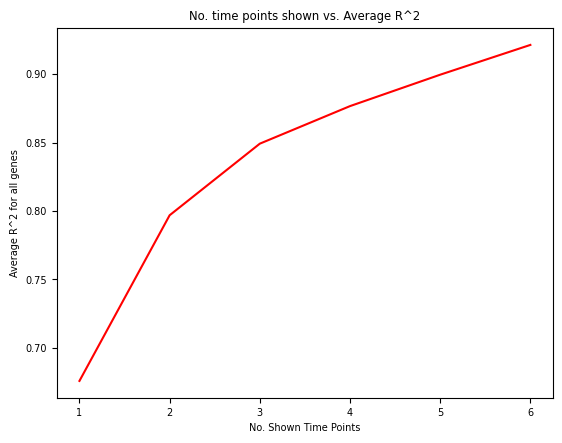

In [ ]:
plt.title(f"No. time points shown vs. Average R^2")
plt.plot([1, 2, 3, 4, 5, 6], [r_avg_6, r_avg_5, r_avg_4, r_avg_3, r_avg_2, r_avg_1], color='red')
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average R^2 for all genes')
plt.show()